# <div align="center">**Task 1 : Unsupervised Learning**

#### Dataset access link: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

### Cleaning the data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
# Uploading the dataset
df = pd.read_csv(r"C:\Users\DELL\Documents\Mall_Customers.csv")

NameError: name 'pd' is not defined

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Checking the number of rows and columns in the dataset
df.shape

(200, 5)

In [ ]:
# Viwing descriptive statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Checking the datatypes
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
# Checking for missing values
print("\nMissing Values Per Column:")
print(df.isnull().sum())


Missing Values Per Column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
# Checking for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


Number of Duplicate Rows: 0


In [ ]:
# Dropping the CustomerID column as it is not required for this analysis
df.drop('CustomerID', axis=1, inplace=True)

Plotting box plots for numerical columns to identify outliers

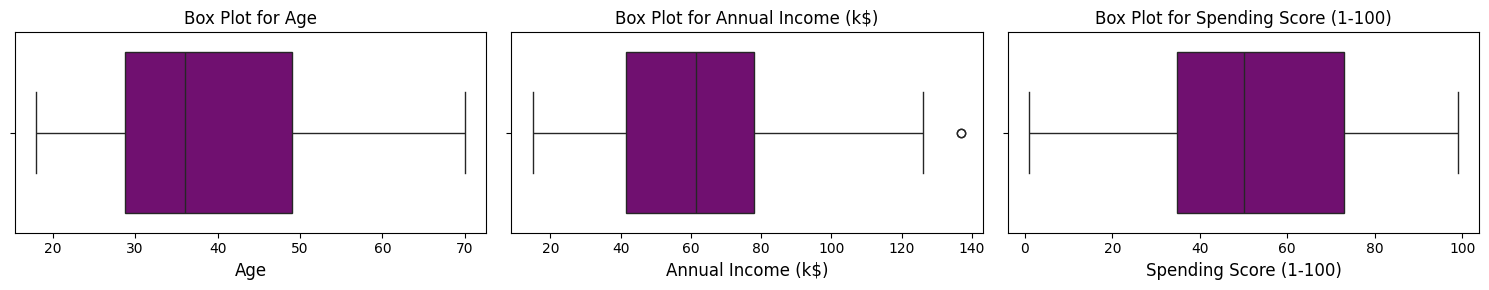

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 3))
for i, col in enumerate(numerical_columns, 1):  
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x=col, color='purple')
    plt.title(f'Box Plot for {col}', fontsize=12)
    plt.xlabel(col, fontsize=12)

plt.tight_layout()
plt.show()

Annual Income is the only column which contains outliers.

In [ ]:
# Removing outliers

Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
# Calculate the IQR
IQR = Q3 - Q1
df = df[(df['Annual Income (k$)'] >= Q1 - 1.5 * IQR) & (df['Annual Income (k$)'] <= Q3 + 1.5 * IQR)]

In [ ]:
#Viewing the shape of the dataset to check how many outliers were there
df.shape

(198, 4)

## Exploratory Data Analysis

Visualizing the Gender distribution

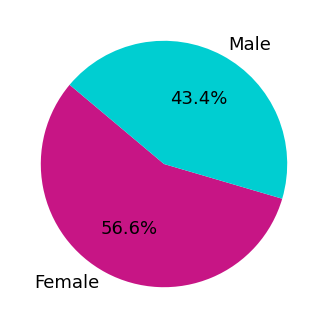

In [ ]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['mediumvioletred','darkturquoise'],  textprops={'fontsize': 13})
plt.show()

Plotting Distribution plots for numerical columns in the dataset

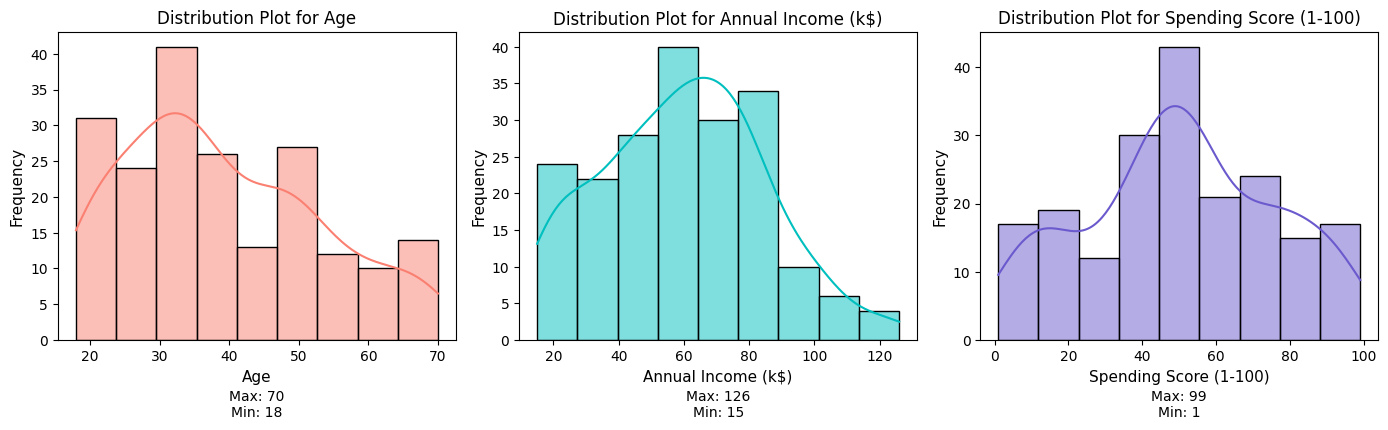

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(14, 4.5))
colors = ['salmon', 'c', 'slateblue']

for i, (col, color) in enumerate(zip(numerical_columns, colors), 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=col, kde=True, color=color)
    plt.title(f'Distribution Plot for {col}', fontsize=12)
    plt.xlabel(col, fontsize=11)
    plt.ylabel('Frequency', fontsize=11)
    plt.text(0.5, -0.25, f"Max: {df[col].max()}\nMin: {df[col].min()}", ha='center', fontsize=10, transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [ ]:
# Defining categories based on Age of customers

bins = [18, 30, 45, 60, np.inf]
labels = ['18-30', '31-45', '46-60', 'Above 60']
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels)


Displaying the Age categories in a Pie Chart

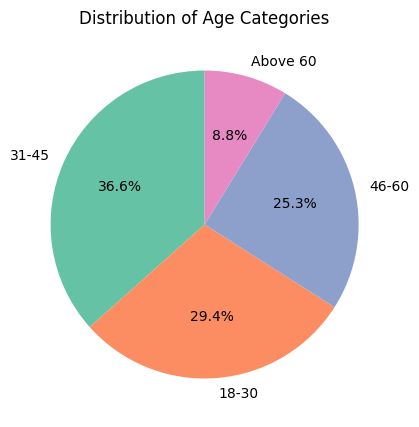

In [ ]:
age_counts = df['Age_Category'].value_counts() # Counting the occurrences of each Age Category

plt.figure(figsize=(6, 5))
age_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2', len(age_counts)), startangle=90)
plt.title('Distribution of Age Categories')
plt.ylabel('') 
plt.show()

Plotting a Stacked Bar Chart of Age Categories by Gender

<Figure size 1000x500 with 0 Axes>

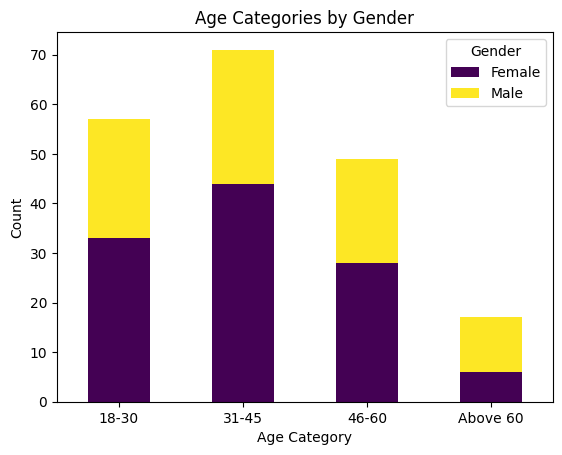

In [ ]:
plt.figure(figsize=(10, 5))
pd.crosstab(df['Age_Category'], df['Gender']).plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Age Categories by Gender')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()


Plotting the average Annual Income and Spending Score by Gender

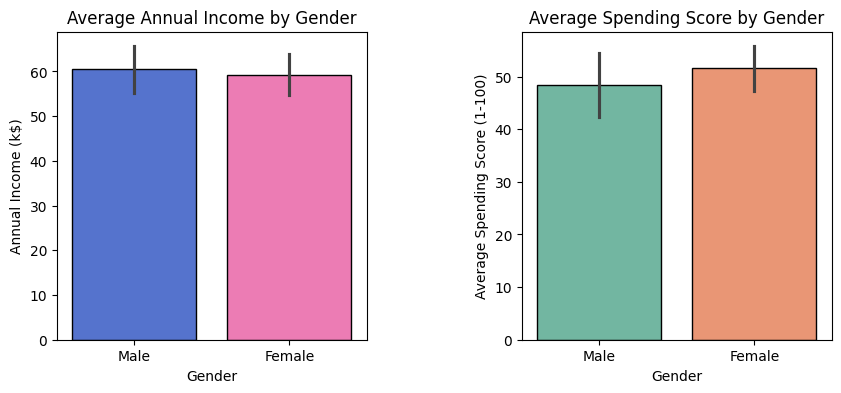

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  

# First plot: Average Annual Income by Gender
sns.barplot(data=df, x='Gender', y='Annual Income (k$)', hue='Gender', 
            palette=['royalblue', 'hotpink'], edgecolor='black', legend=False, ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Annual Income (k$)')
axes[0].set_title('Average Annual Income by Gender')

# Second plot: Average Spending Score by Gender
sns.barplot(data=df, x='Gender', y='Spending Score (1-100)', hue='Gender', 
            palette='Set2',edgecolor='black', legend=False, ax=axes[1])
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Average Spending Score (1-100)')
axes[1].set_title('Average Spending Score by Gender')

plt.subplots_adjust(wspace=0.5) 
plt.show()

Visualising the distribution of Annual Income and Spending Score by Gender, using Boxplots & Swarmplots

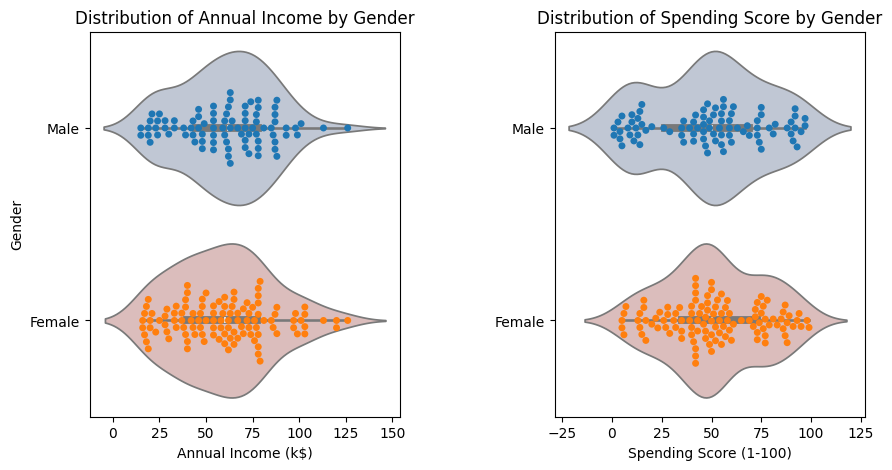

In [ ]:
plt.figure(1 , figsize = (10 , 5))
n = 0 
for cols in ['Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 2 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , hue='Gender', palette = 'vlag', legend=False)
    sns.swarmplot(x = cols , y = 'Gender' ,hue='Gender', data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Distribution of Spending Score by Gender' if n == 2 else 'Distribution of Annual Income by Gender')
plt.show()  

In [ ]:
# Defining categories based on Income level of customers

bins = [15, 35, 55, 75, 95, 115, 137]
labels = ['15-35k', '36-55k', '56-75k', '76-95k', '96-115k', '116-137k']

df['Income_Category'] = pd.cut(df['Annual Income (k$)'], bins=bins, labels=labels, ordered=True)

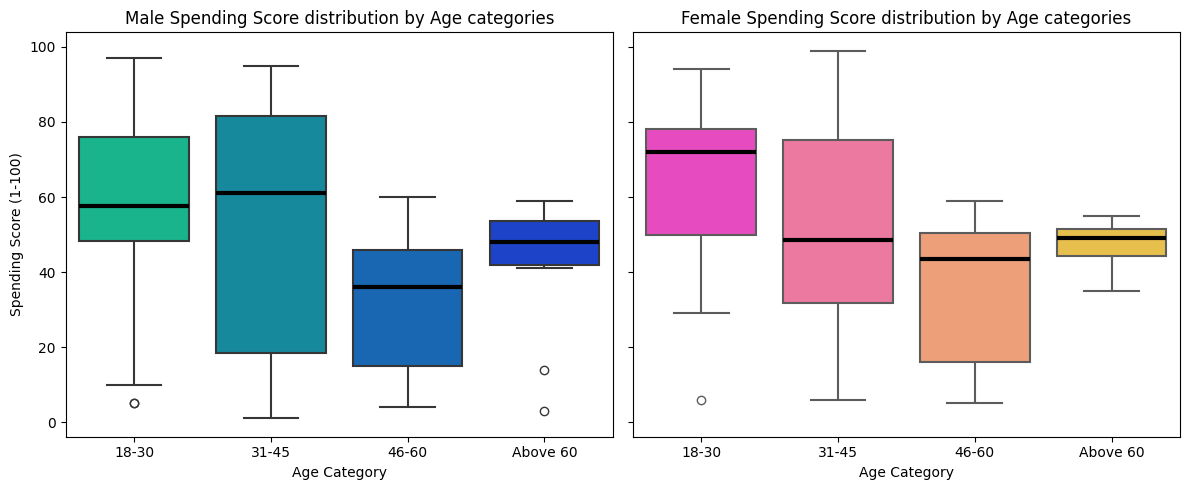

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Male Boxplot
sns.boxplot(data=df[df['Gender'] == 'Male'], x='Age_Category', y='Spending Score (1-100)', 
            hue='Age_Category', palette='winter_r', ax=axes[0], linewidth=1.5, legend=False)
axes[0].set_title('Male Spending Score distribution by Age categories')
axes[0].set_xlabel('Age Category')
axes[0].set_ylabel('Spending Score (1-100)')

# Female Boxplot
sns.boxplot(data=df[df['Gender'] == 'Female'], x='Age_Category', y='Spending Score (1-100)', 
            hue='Age_Category', palette='spring', ax=axes[1], linewidth=1.5, legend=False)
axes[1].set_title('Female Spending Score distribution by Age categories')
axes[1].set_xlabel('Age Category')
axes[1].set_ylabel('')

for ax in axes:
    for line in ax.lines[4::6]:
        line.set_linewidth(3)  
        line.set_color('black')
plt.tight_layout()
plt.show()

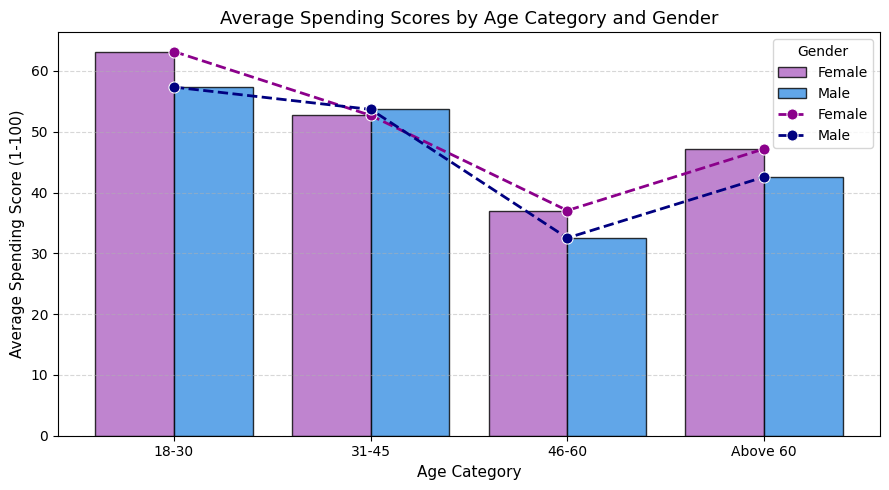

Average Spending Scores by Age Category and Gender:

Gender           Female       Male
Age_Category                      
18-30         63.181818  57.333333
31-45         52.681818  53.666667
46-60         37.035714  32.523810
Above 60      47.166667  42.545455


In [ ]:
# Calculating the average spending score for each Age Category and Gender
avg_spending = df.groupby(['Age_Category', 'Gender'], observed=True)['Spending Score (1-100)'].mean().reset_index()

plt.figure(figsize=(9, 5))

# Creating the barplot
sns.barplot(x='Age_Category', y='Spending Score (1-100)', hue='Gender', data=avg_spending, 
            palette=['mediumorchid', 'dodgerblue'], edgecolor='black', alpha=0.8)

# Adding a line plot on top of the bar chart
sns.lineplot(x='Age_Category', y='Spending Score (1-100)', hue='Gender', data=avg_spending, 
             marker='o', linestyle='dashed', linewidth=2, markersize=8, palette=['darkmagenta', 'navy'])

plt.title('Average Spending Scores by Age Category and Gender', fontsize=13)
plt.xlabel('Age Category', fontsize=11)
plt.ylabel('Average Spending Score (1-100)', fontsize=11)
plt.legend(title='Gender', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Printing the average values
print("Average Spending Scores by Age Category and Gender:\n")
print(avg_spending.pivot(index='Age_Category', columns='Gender', values='Spending Score (1-100)'))

 Visualizing the overall distribution of Spending Score by Age and Income categories

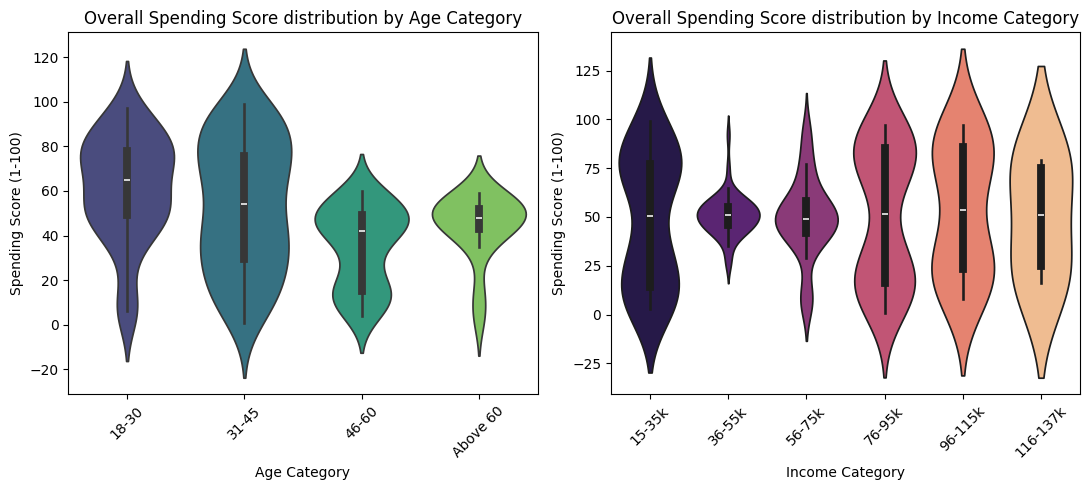

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

# Violin Plot for Age Category and Spending Score
sns.violinplot(data=df, x='Age_Category', y='Spending Score (1-100)', hue='Age_Category', palette='viridis', ax=axes[0], legend=False)
axes[0].set_title('Overall Spending Score distribution by Age Category')
axes[0].set_xlabel('Age Category')
axes[0].set_ylabel('Spending Score (1-100)')
axes[0].tick_params(axis='x', rotation=45)

# Violin Plot for Income and Spending Score
sns.violinplot(data=df, x='Income_Category', y='Spending Score (1-100)', hue='Income_Category', palette='magma', ax=axes[1], legend=False)
axes[1].set_title('Overall Spending Score distribution by Income Category')
axes[1].set_xlabel('Income Category')
axes[1].set_ylabel('Spending Score (1-100)')
axes[1].tick_params(axis='x', rotation=45)

# Display the plots
plt.tight_layout()
plt.show()

Creating a Pairplot for Income, Age and Spending Score - coloured by Gender

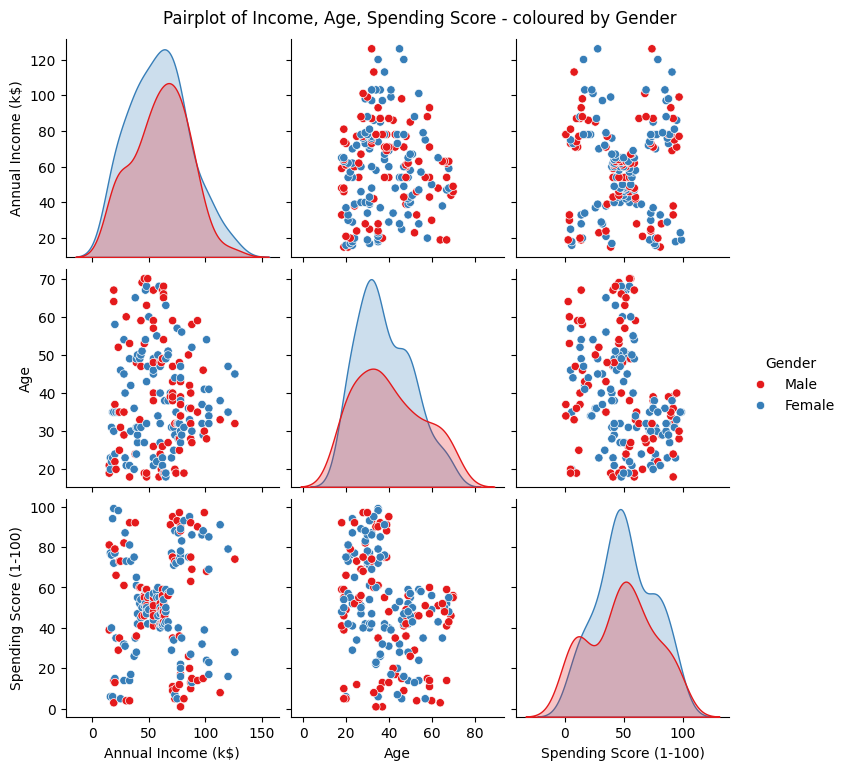

In [ ]:
sns.pairplot(df[['Annual Income (k$)', 'Age', 'Spending Score (1-100)', 'Gender']], hue='Gender', palette='Set1',height=2.5)
plt.suptitle('Pairplot of Income, Age, Spending Score - coloured by Gender', y=1.02)
plt.show()

In [ ]:
# Encoding the 'Gender' column to numerical values( Female;0 , Male;1)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [ ]:
df.dtypes

Gender                       int32
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
Age_Category              category
Income_Category           category
dtype: object

Evaluating the correlation between columns, using a Heatmap.

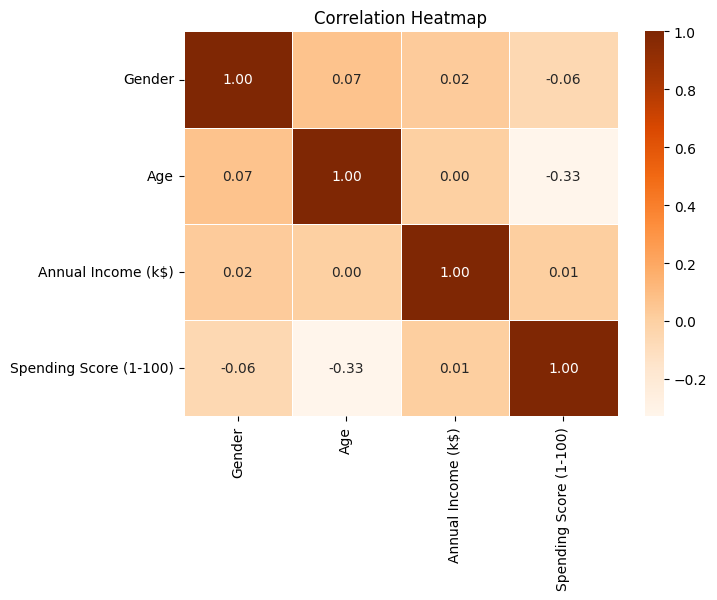

In [ ]:
df_corr = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # Selecting relevant columns for correlation

corr_matrix = df_corr.corr()  # Calculating the correlation matrix

# Creating the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Oranges', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## K-Means Clustering

#### Using 'Age' and 'Spending Score features'

In [ ]:
from sklearn.cluster import KMeans

# Selecting features: Age and Spending Score
X1 = df[['Age', 'Spending Score (1-100)']].values

Plotting an Elbow Graph to determine the optimal number of clusters.

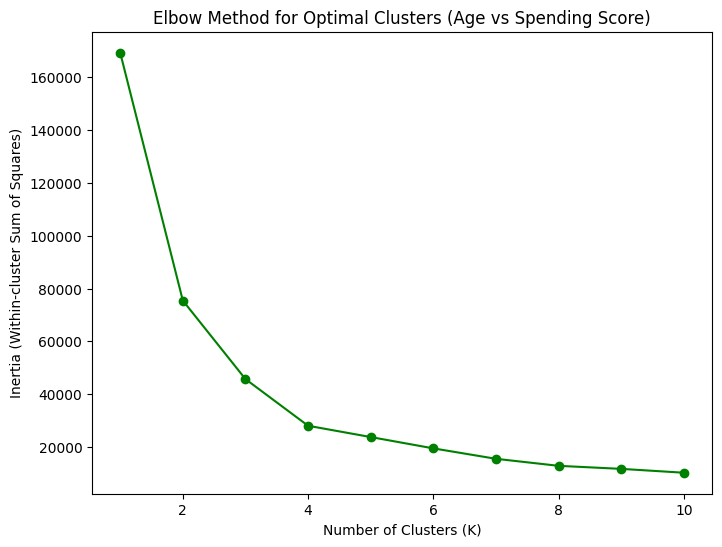

In [ ]:
inertia = [KMeans(n_clusters=n, random_state=111).fit(X1).inertia_ for n in range(1, 11)]

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', color='green')
plt.title('Elbow Method for Optimal Clusters (Age vs Spending Score)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.grid(False)
plt.show()


The elbow graph helps in selecting an appropriate number of clusters for K-means clustering by identifying the point where adding more clusters ceases to provide significant improvement in clustering quality.

From the above graph, 4 clusters seems to be the optimal point where the decrease in WCSS starts to slow down and form a noticeable "elbow".

In [ ]:
optimal_k = 4 

kmeans = KMeans(n_clusters=optimal_k)  # Fitting KMeans model
kmeans.fit(X1)

labels1 = kmeans.labels_    # Extracting the labels and centroids (Centroids are the central points of each cluster)
centroids1 = kmeans.cluster_centers_

#Visualizing Decision Boundaries (to indicate which regions belong to which cluster)
h = 0.02  
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the cluster for each point in the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])  
Z = Z.reshape(xx.shape)  # Reshaping Z to match the meshgrid shape


K-Means Clustering scatter plot (Age vs Spending Score) with Decision Boundaries

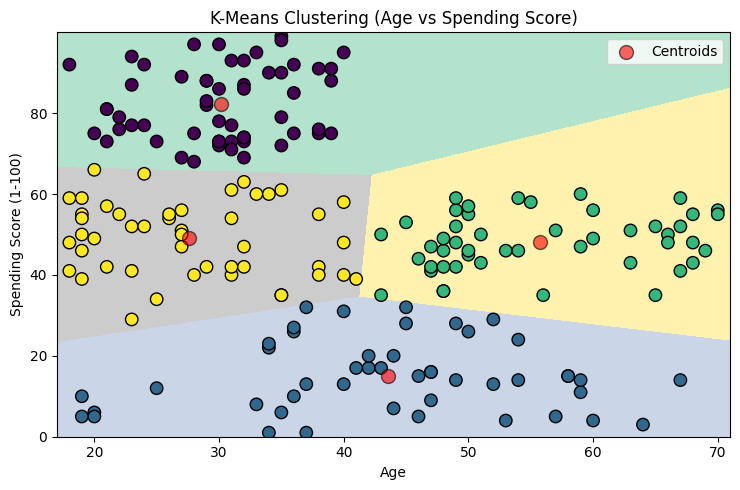

In [ ]:
plt.figure(figsize=(7.5, 5))

# Plotting decision boundaries
plt.imshow(
    Z,
    interpolation='nearest',
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Pastel2,
    aspect='auto',
    origin='lower'
)
# Overlaying data points
plt.scatter(
    x=X1[:, 0],
    y=X1[:, 1],
    c=labels1,
    edgecolor='k',
    cmap='viridis',
    s=80,
)
# Overlaying centroids
plt.scatter(
    x=centroids1[:, 0],
    y=centroids1[:, 1],
    s=100,
    c='red',
    edgecolor='k',
    alpha=0.6,
    marker='o',
    label='Centroids'
)
# Adding labels, title, and legend
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering (Age vs Spending Score)')
plt.legend()
plt.tight_layout()
plt.show()


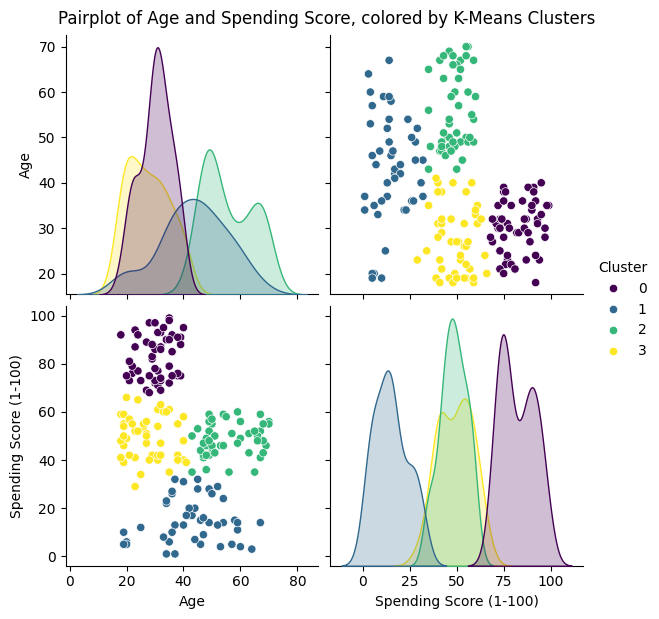

In [ ]:
df['Cluster'] = labels1  # Adding cluster labels to the dataset

features_for_pairplot = ['Age', 'Spending Score (1-100)', 'Cluster'] # Selecting the features

# Creating the pairplot
sns.pairplot(
    df[features_for_pairplot],
    hue='Cluster',
    palette='viridis',
    diag_kind='kde',  # Kernel Density Estimation for diagonal plots
    height= 3
)
plt.suptitle('Pairplot of Age and Spending Score, colored by K-Means Clusters', y=1.02)
plt.show()

#### Using 'Annual Income' and 'Spending Score' features

In [ ]:
# Defining the feature set for Annual Income and Spending Score
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

In [ ]:
# Using the Elbow Method to determine optimal number of clusters

inertia = []
for n in range(1, 11):
    algorithm = KMeans(
        n_clusters=n,
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=0.0001,
        random_state=111,
        algorithm='elkan'
    )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1435: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


Plotting the Elbow graph

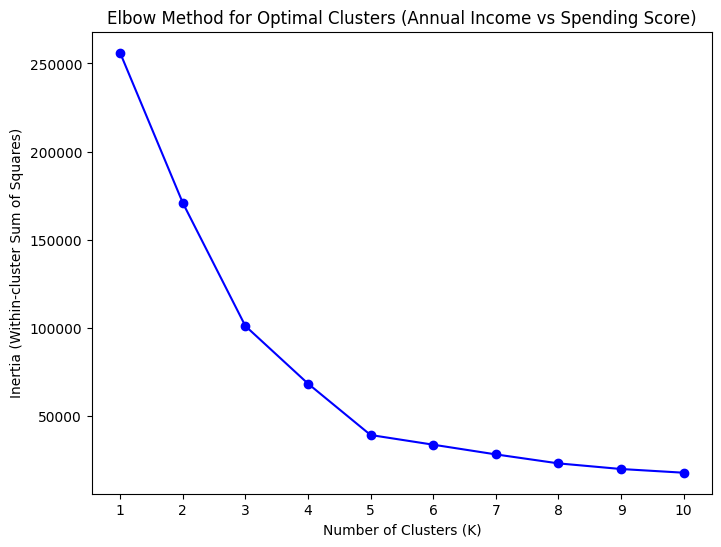

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', color='b')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.title('Elbow Method for Optimal Clusters (Annual Income vs Spending Score)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.grid(False)
plt.show()


The optimal number of clusters seems to be 5, where the decrease in WCSS starts to slow down.

In [ ]:
# K-Means Clustering with 5 Clusters

algorithm = KMeans(
    n_clusters=5,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    random_state=111,
    algorithm='elkan'
)
algorithm.fit(X2)

KMeans(algorithm='elkan', n_clusters=5, n_init=10, random_state=111)

In [ ]:
labels2 = algorithm.labels_        #Extracting Labels and Centroids
centroids2 = algorithm.cluster_centers_

h = 0.02    # Defining the grid for decision boundaries
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])  # Predicting the cluster labels for each point in the grid
Z2 = Z2.reshape(xx.shape) 

K-Means Clustering scatter plot (Income vs Spending Score) with Decision Boundaries

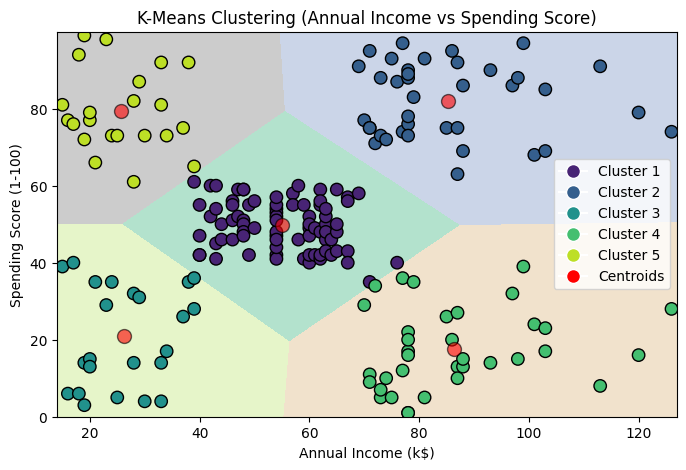

In [ ]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.cm as cm

# Extracting fixed colors from the viridis palette
viridis = cm.viridis
cluster_colors = [viridis(0.1), viridis(0.3), viridis(0.5), viridis(0.7), viridis(0.9)]  # Adjust indices for desired colors

plt.figure(figsize=(8, 5))
# Plotting decision boundaries
plt.imshow(
    Z2,
    interpolation='nearest',
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Pastel2,
    aspect='auto',
    origin='lower'
)
# Overlaying data points with the fixed cluster colors
scatter = plt.scatter(
    x=X2[:, 0],
    y=X2[:, 1],
    c=[cluster_colors[label] for label in labels2],
    edgecolor='k',
    s=80
)
# Overlaying centroids with red color
plt.scatter(
    x=centroids2[:, 0],
    y=centroids2[:, 1],
    s=100,
    c='red',
    edgecolor='k',
    alpha=0.6,
    marker='o',
    label='Centroids'
)
# Create a custom legend with circles for the clusters
cluster_patches = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {i+1}')
                   for i, color in enumerate(cluster_colors)]

centroid_patch = Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Centroids')
plt.legend(handles=cluster_patches + [centroid_patch])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering (Annual Income vs Spending Score)')
plt.show()

Pairplot of Income and Spending Score, colored by K-Means Clusters

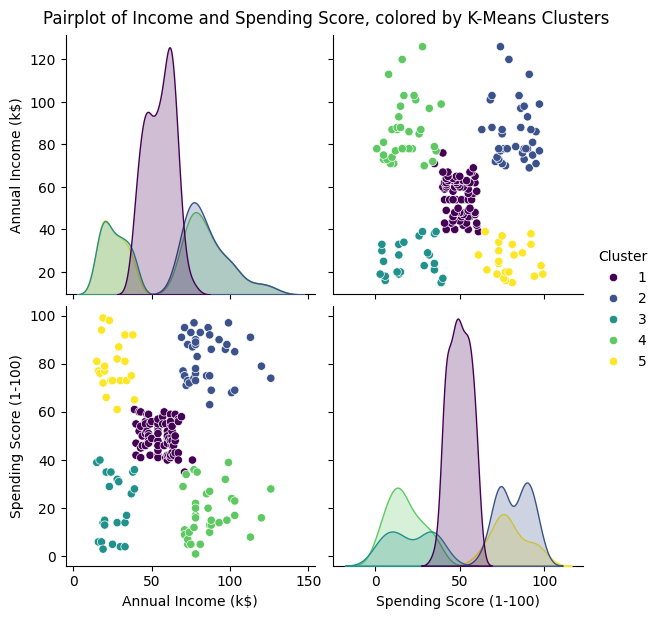

In [ ]:
df['Cluster'] = labels2 +1  # Adding cluster labels to the dataset

features_for_pairplot = ['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster'] # Selecting the features

# Creating the pairplot
sns.pairplot(
    df[features_for_pairplot],
    hue='Cluster',
    palette='viridis',
    diag_kind='kde',  # Kernel Density Estimation for diagonal plots
    height= 3,
)
plt.suptitle('Pairplot of Income and Spending Score, colored by K-Means Clusters', y=1.02)
plt.show()

Bar Chart to analyze cluster sizes

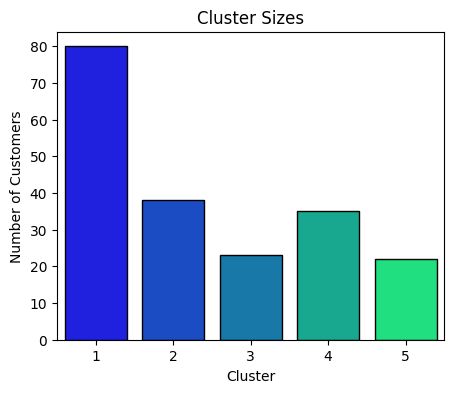

In [ ]:
df['Cluster'] = labels2   # Assigning cluster labels to the DataFrame
cluster_sizes = df['Cluster'].value_counts().sort_index()

plt.figure(figsize=(5, 4))   # Plotting cluster sizes
sns.barplot(x=cluster_sizes.index + 1, y=cluster_sizes.values, hue=cluster_sizes.index, palette='winter', edgecolor='black', legend=False)
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


Calculating the Silhouette score of the K-Means clusters

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
  
# Standardize the data
X_scaled = StandardScaler().fit_transform(X2)

# Fitting KMeans with optimal K (5 clusters))
optimal_k = 5  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Adding the cluster labels to the DataFrame
df['Cluster_KMeans'] = cluster_labels

# Compute Silhouette Score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)

# Print the average silhouette score
print(f"Silhouette Score for K-Means (K={optimal_k}): {silhouette_avg:.5f}")


Silhouette Score for K-Means (K=5): 0.55992


Displaying the Silhouette score of the K-Means clusters

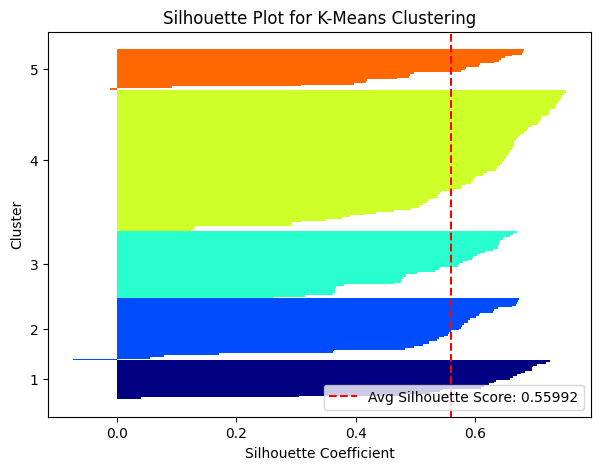

In [ ]:
from sklearn.metrics import silhouette_samples

# Compute silhouette scores for each sample
silhouette_vals = silhouette_samples(X_scaled, cluster_labels)

# Initialize y-axis lower and upper boundaries for the plot
y_ax_lower, y_ax_upper = 0, 0
yticks = []

plt.figure(figsize=(7, 5))
# Plot silhouette values for each cluster
n_clusters = optimal_k
for i in range(n_clusters):
    c_silhouette_vals = silhouette_vals[cluster_labels == i]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)

    # Color for each cluster
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1, edgecolor='none', color=color)

    yticks.append(y_ax_lower + (y_ax_upper - y_ax_lower) / 2.)
    y_ax_lower += len(c_silhouette_vals)  # Update for next cluster

# Add a vertical red line for the average silhouette score 
plt.axvline(silhouette_avg, color='red', linestyle='--', label=f'Avg Silhouette Score: {silhouette_avg:.5f}')

# Set y-ticks and labels for clusters
plt.yticks(yticks, range(1, n_clusters + 1))  
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.title('Silhouette Plot for K-Means Clustering')
plt.legend()
plt.show()

In [ ]:
# Ensure 'Cluster_KMeans' has labels from 1 to 5 instead of 0 to 4
df['Cluster_KMeans'] = df['Cluster_KMeans'].astype(int) + 1  

# Define feature names for profiling
profile_features = ['Annual Income (k$)', 'Spending Score (1-100)']

# Compute mean values for each cluster
cluster_profile = df.groupby('Cluster_KMeans')[profile_features].mean().reset_index()

# Assign descriptive labels based on observed patterns
def describe_cluster(row):
    income = row['Annual Income (k$)']
    spending = row['Spending Score (1-100)']
    
    if income > 70 and spending > 60:
        return "High Income, High Spending"
    elif income > 70 and spending < 40:
        return "High Income, Low Spending"
    elif income < 40 and spending > 60:
        return "Low Income, High Spending"
    elif income < 40 and spending < 40:
        return "Low Income, Low Spending"
    else:
        return "Moderate Income & Spending"

cluster_profile['Description'] = cluster_profile.apply(describe_cluster, axis=1)
cluster_profile = cluster_profile[['Cluster_KMeans','Description']]
print("Cluster Profile Summary (Based on Income & Spending Score):")
print(cluster_profile)

Cluster Profile Summary (Based on Income & Spending Score):
   Cluster_KMeans                 Description
0               1   Low Income, High Spending
1               2   High Income, Low Spending
2               3  High Income, High Spending
3               4  Moderate Income & Spending
4               5    Low Income, Low Spending


#### Using 'Age', 'Annual Income' and 'Spending Score' features

K-Means Clustering 3D scatter plot for Age, Income and Spending Score

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Selecting features for 3D plotting
X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

 # Applying the K-Means model with 5 clusters
kmeans_3d = KMeans(
    n_clusters=5,  # Assuming 5 clusters
    init='k-means++',
    n_init=10,
    max_iter=300,
    random_state=111,
    algorithm='elkan'
)
kmeans_3d.fit(X3)

labels3 = kmeans_3d.labels_   # Extracting Labels

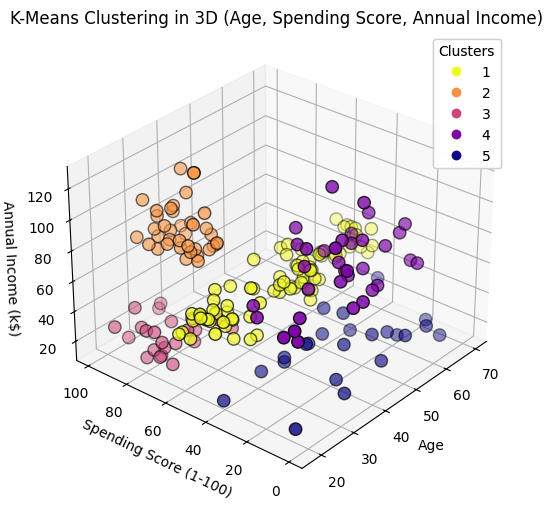

In [ ]:
labels3 = labels3 +1  

# Creating the 3D scatter plot
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting the 3D scatter plot with color labels based on the clusters
scatter = ax.scatter(
    X3[:, 0], X3[:, 2], X3[:, 1],  
    c=labels3, 
    cmap='plasma_r', 
    s=80, 
    edgecolor='k',
)
# Setting the labels for the axes (Adjusted positions)
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score (1-100)')  
ax.set_zlabel('Annual Income (k$)')  

ax.set_title('K-Means Clustering in 3D (Age, Spending Score, Annual Income)')
ax.view_init(elev=30, azim=220)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()

Calculating mean values of numerical features for each cluster

In [ ]:
# Selecting features for clustering
X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Creating a new column 'Cluster' in the original DataFrame
df['Cluster'] = labels3

# Calculate and display the mean values of each feature per cluster
cluster_means = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_means)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
1        43.088608           55.291139               49.569620
2        32.763158           85.210526               82.105263
3        25.521739           26.304348               78.565217
4        40.914286           86.342857               17.571429
5        45.217391           26.304348               20.913043


Visualizing the mean values of numerical features by cluster

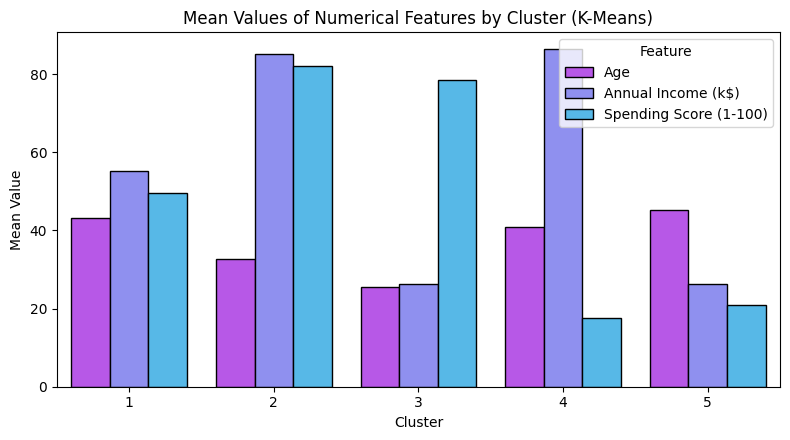

In [ ]:
cluster_means_reset = cluster_means.reset_index()
cluster_means_melted = cluster_means_reset.melt(id_vars='Cluster', var_name='Feature', value_name='Mean Value')
cluster_means_melted['Cluster']

# Plotting the barplot
num_features = len(cluster_means_melted['Feature'].unique())  # Defining the number of features

plt.figure(figsize=(8, 4.5))  
sns.barplot(data=cluster_means_melted, x='Cluster', y='Mean Value', hue='Feature', palette='cool_r', edgecolor='black')
plt.title('Mean Values of Numerical Features by Cluster (K-Means)', fontsize=12)
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.legend(title='Feature')
plt.tight_layout()
plt.show()

Exploring the distributions of Age, Annual Income and Spending Score features, by K-Means cluster.

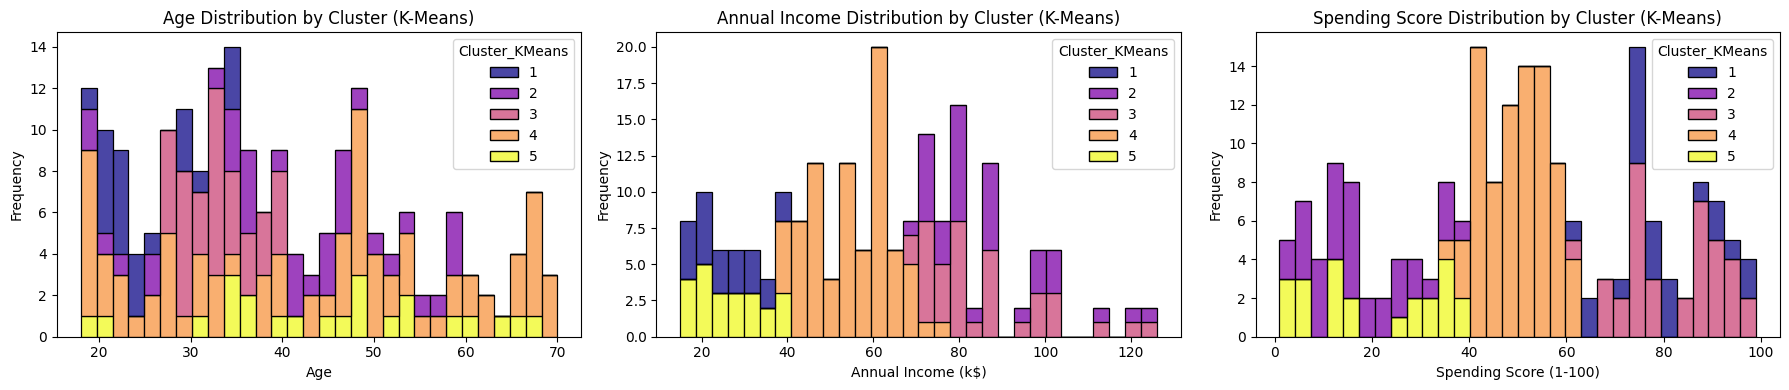

In [ ]:
df['Cluster_KMeans'] = cluster_labels + 1

plt.figure(figsize=(18, 4))

# Plotting the distribution of 'Age' by Cluster (KMeans)
plt.subplot(1, 3, 1)  
sns.histplot(data=df, x='Age', hue='Cluster_KMeans', multiple='stack', bins=30, palette='plasma')
plt.title('Age Distribution by Cluster (K-Means)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plotting the distribution of 'Annual Income (k$)' by Cluster (KMeans)
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='Annual Income (k$)', hue='Cluster_KMeans', multiple='stack', bins=30, palette='plasma')
plt.title('Annual Income Distribution by Cluster (K-Means)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

# Plotting the distribution of 'Spending Score (1-100)' by Cluster (KMeans)
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='Spending Score (1-100)', hue='Cluster_KMeans', multiple='stack', bins=30, palette='plasma')
plt.title('Spending Score Distribution by Cluster (K-Means)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

plt.tight_layout()  
plt.show()

In [ ]:
# Define cluster descriptions based on feature means
cluster_summary = {
    "Cluster": [1, 2, 3, 4, 5],
    "Profile": [
        "High spenders, low income",
        "Young customers with moderate income and spending",
        "Older customers with high income but low spending",
        "Middle-aged, balanced income and spending",
        "Budget-conscious customers with low spending"
    ]
}
# Create DataFrame
cluster_profile_df = pd.DataFrame(cluster_summary)

# Display the summary table
print("\nCluster Profile Summary:")
print(cluster_profile_df.to_string(index=False))


Cluster Profile Summary:
 Cluster                                           Profile
       1                         High spenders, low income
       2 Young customers with moderate income and spending
       3 Older customers with high income but low spending
       4         Middle-aged, balanced income and spending
       5      Budget-conscious customers with low spending


## Agglomerative Clustering 

#### Using "Annual Income' and 'Spending Score' features

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
numerical_features = ['Annual Income (k$)', 'Spending Score (1-100)']  # Selecting the numerical features
X = df[numerical_features]

scaler = StandardScaler()  # Standardizing the data
X_scaled = scaler.fit_transform(X) 

Plotting a Dendrogram

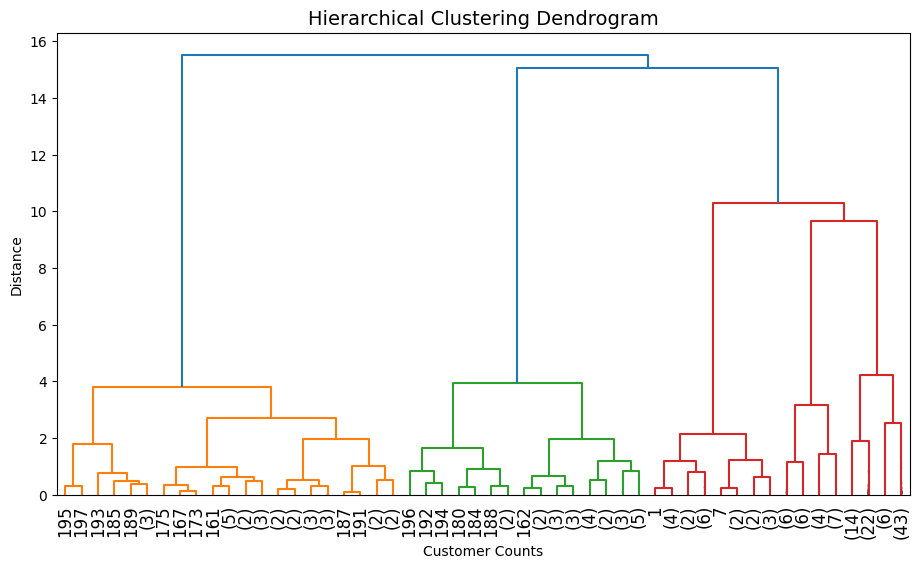

In [ ]:
# Using Ward's method
Z = linkage(X_scaled, method='ward')  # Ward's method minimizes variance within clusters, making it effective for hierarchical clustering.

plt.figure(figsize=(11, 6))
dendrogram(Z, p=5, truncate_mode='level', leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram', fontsize=14)
plt.xlabel('Customer Counts')
plt.ylabel('Distance')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

silhouette_scores = []    # Calculating silhouette scores for different number of clusters    
for k in range(2, 11):
    agg_clustering = AgglomerativeClustering(n_clusters=k)
    cluster_labels = agg_clustering.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

Plotting Silhouette Scores for Hierarchical Clustering

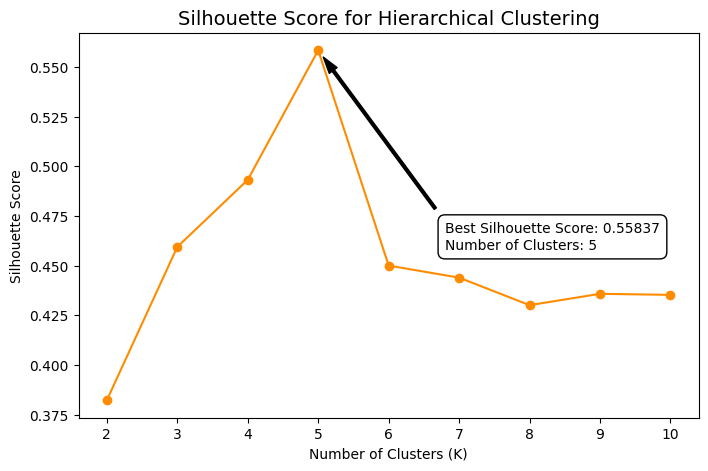

In [ ]:
# Plotting Silhouette scores

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='darkorange')
plt.title('Silhouette Score for Hierarchical Clustering', fontsize=14)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))

# Finding the index of the maximum silhouette score
best_index = np.argmax(silhouette_scores)
best_score = silhouette_scores[best_index]
best_k = best_index + 2  # Adding 2 to account for starting K value from 2


# Annotating the best score and the corresponding number of clusters
plt.annotate(f'Best Silhouette Score: {best_score:.5f}\nNumber of Clusters: {best_k}',
             xy=(best_k, best_score),
             xytext=(best_k + 1.8, best_score - 0.1), 
             arrowprops=dict(facecolor='black', width=2, headwidth=7, shrink=0.04),
             fontsize=10,
             bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))

plt.show()

Both KMeans and Hierarchical Clustering suggest the same optimal number of clusters (5), which indicates consistency in the clustering results across the two methods.

Average Silhouette Score for Hierarchial clustering : 0.55837

In [ ]:
# Fitting Agglomerative Clustering with optimal K value (5 clusters)
optimal_k = 5

agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
cluster_labels = agg_clustering.fit_predict(X_scaled)
df['Cluster_Hierarchical'] = cluster_labels

Scatter plot to visualize the clusters of customers obtained based on Annual Income and Spending Score

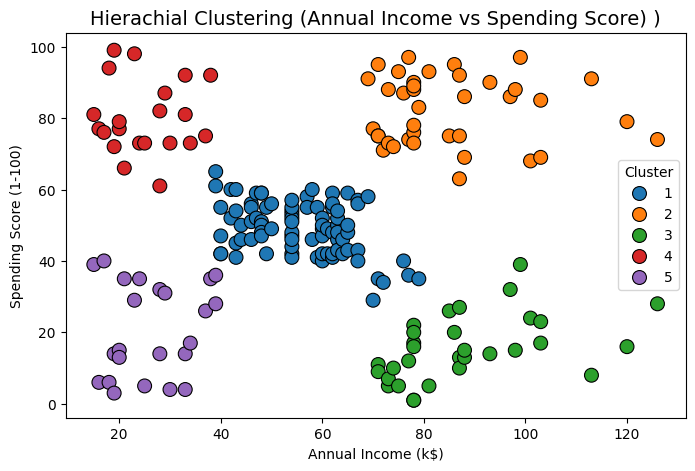

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue=df['Cluster_Hierarchical'] + 1, palette='tab10', s=100, edgecolor='k')
plt.title('Hierachial Clustering (Annual Income vs Spending Score) )', fontsize=14)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

Bar Chart to analyze cluster sizes

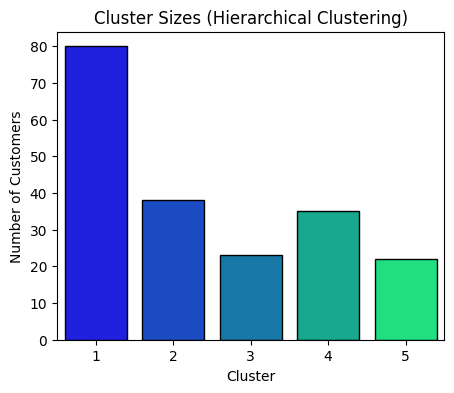

In [ ]:
plt.figure(figsize=(5, 4))
sns.barplot(x=cluster_sizes.index + 1, y=cluster_sizes.values, hue=cluster_sizes.index, palette='winter',edgecolor='black', legend=False)
plt.title('Cluster Sizes (Hierarchical Clustering)')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
# Creating AgglomerativeClustering model with 5 clusters using 'ward' linkage
model = AgglomerativeClustering(n_clusters=5, linkage='ward')

model_predict = model.fit_predict(X_scaled)  # Fitting the model to the raw data

Displaying the Silhouette score of the Hierarchical clusters

In [ ]:
import collections
from sklearn.metrics import silhouette_samples
from matplotlib import cm

print('Agglomerative Clustering results using Ward Linkage:', collections.Counter(model_predict))  # Cluster distribution

cluster_labels = np.unique(model_predict)  # Unique cluster labels
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X_scaled, model_predict, metric='euclidean')  # Calculating silhouette scores for each data point

Agglomerative Clustering results using Ward Linkage: Counter({0: 85, 1: 38, 2: 31, 4: 23, 3: 21})


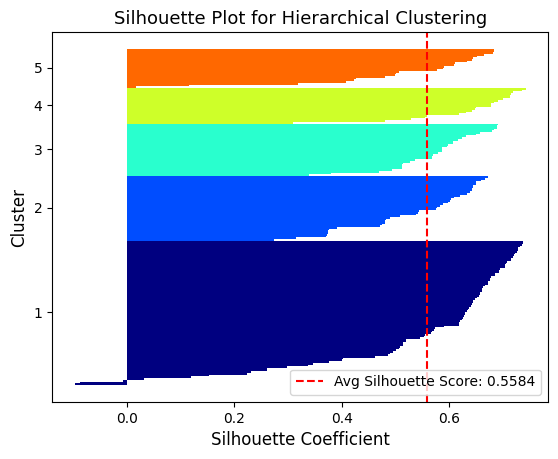

In [ ]:
# Compute silhouette values
silhouette_vals = silhouette_samples(X_scaled, model_predict)

# Compute average silhouette score
silhouette_avg = np.mean(silhouette_vals)

# Initialize y-axis lower and upper bounds
y_ax_lower, y_ax_upper = 0, 0
yticks = []

# Iterate over each cluster and plot silhouette values
for i, c in enumerate(np.unique(model_predict)):  # Use unique labels
    c_silhouette_vals = silhouette_vals[model_predict == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)

    # Color for each cluster
    color = cm.jet(float(i) / n_clusters)

    # Plot horizontal bar chart for silhouette scores
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

# Adding a vertical red line for the average silhouette score
plt.axvline(silhouette_avg, color='red', linestyle='--', label=f'Avg Silhouette Score: {silhouette_avg:.4f}')

plt.yticks(yticks, [f'{i+1}' for i in range(n_clusters)])  
plt.xlabel('Silhouette Coefficient', fontsize=12)
plt.ylabel('Cluster', fontsize=12)
plt.title('Silhouette Plot for Hierarchical Clustering', fontsize=13)
plt.legend()
plt.show()

#### Using 'Age', 'Annual Income' and 'Spending Score' features

Hierarchical Clustering 3D scatter plot for Age, Income and Spending Score

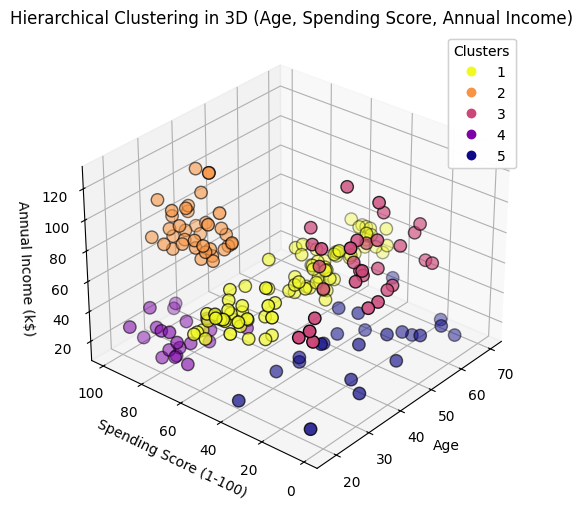

In [ ]:
labels_hierarchical = model_predict + 1  # Adjust cluster labels to start from 1

# Creating the 3D scatter plot for hierarchical clustering
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting the 3D scatter plot with color labels based on the clusters
scatter = ax.scatter(
    X3[:, 0], X3[:, 2], X3[:, 1], 
    c=labels_hierarchical, 
    cmap='plasma_r', 
    s=80, 
    edgecolor='k',
)
# Setting the labels for the axes 
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score (1-100)')  
ax.set_zlabel('Annual Income (k$)') 
ax.set_title('Hierarchical Clustering in 3D (Age, Spending Score, Annual Income)')

# Adjusting the view to flip the graph
ax.view_init(elev=30, azim=220) 
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()

Visualizing the mean values of numerical features by cluster

In [ ]:
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']   # Adding the 'Age' column to the numerical features for cluster mean calculation

cluster_means = df.groupby('Cluster_Hierarchical')[numerical_features].mean().reset_index() # Calculating mean values of numerical features for each hierarchical cluster
cluster_means.rename(columns={'Cluster_Hierarchical': 'Cluster'}, inplace=True)

cluster_means['Cluster'] += 1
print(cluster_means)

   Cluster        Age  Annual Income (k$)  Spending Score (1-100)
0        1  42.482353           55.811765               49.129412
1        2  32.763158           85.210526               82.105263
2        3  41.290323           87.870968               15.516129
3        4  25.333333           25.095238               80.047619
4        5  45.217391           26.304348               20.913043


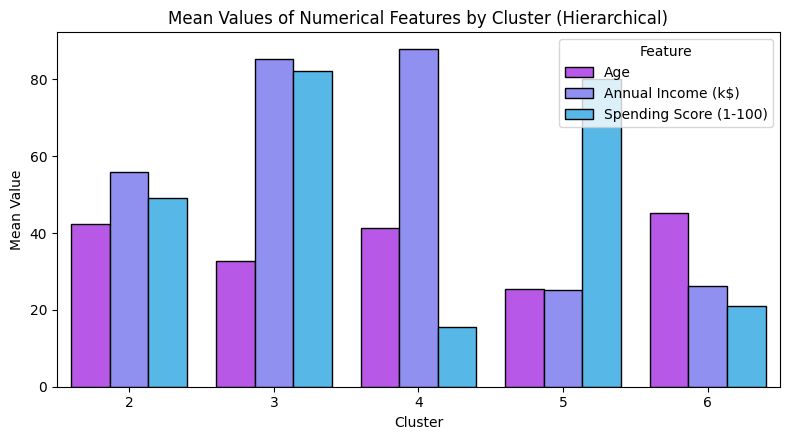

In [ ]:
cluster_means_melted = cluster_means.melt(id_vars='Cluster', var_name='Feature', value_name='Mean Value')  # Melting the cluster means DataFrame to have a long format
cluster_means_melted['Cluster'] += 1

num_features = len(cluster_means_melted['Feature'].unique())  # Defining the number of features

plt.figure(figsize=(8, 4.5))  # Visualizing the characteristics of each cluster
sns.barplot(data=cluster_means_melted, x='Cluster', y='Mean Value', hue='Feature',  palette='cool_r',edgecolor='black')
plt.title('Mean Values of Numerical Features by Cluster (Hierarchical)', fontsize=12)
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.legend(title='Feature')
plt.tight_layout()
plt.show()

Exploring the distributions of Age, Annual Income and Spending Score features, by Hierarchical cluster.

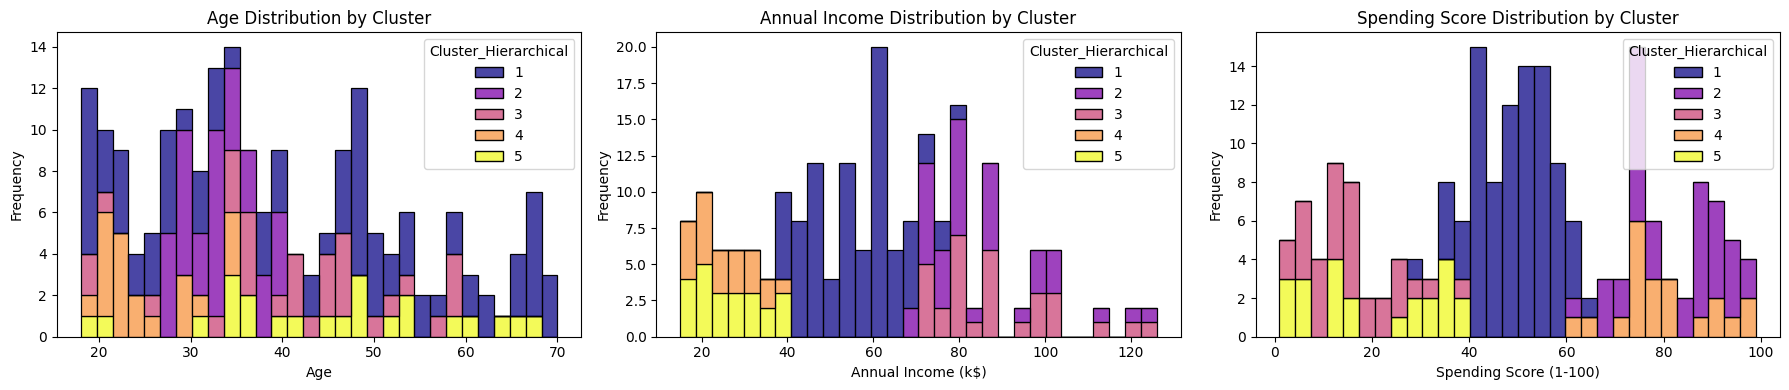

In [ ]:
df['Cluster_Hierarchical'] = df['Cluster_Hierarchical'] + 1
plt.figure(figsize=(18, 4))

# Plotting the distribution of 'Age' by Cluster
plt.subplot(1, 3, 1)  
sns.histplot(data=df, x='Age', hue='Cluster_Hierarchical', multiple='stack', bins=30, palette='plasma')
plt.title('Age Distribution by Cluster')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plotting the distribution of 'Annual Income (k$)' by Cluster
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='Annual Income (k$)', hue='Cluster_Hierarchical', multiple='stack', bins=30, palette='plasma')
plt.title('Annual Income Distribution by Cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

# Plotting the distribution of 'Spending Score (1-100)' by Cluster
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='Spending Score (1-100)', hue='Cluster_Hierarchical', multiple='stack', bins=30, palette='plasma')
plt.title('Spending Score Distribution by Cluster')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

plt.tight_layout()  
plt.show()

## Gaussian Mixture Model (GMM)

#### Using 'Annual Income' and 'Spending Score' features

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

In [ ]:
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = MinMaxScaler()   # Standardizing the features
features_scaled = scaler.fit_transform(features)

AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) are model selection criteria.
AIC and BIC both help identify the best number of components by penalizing for model complexity.

AIC generally decreases with more clusters, favoring complex models, while BIC penalizes complexity more and typically has a clear minimum. We use these scores to find the optimal number of components.

Line plot for AIC and BIC scores vs number of components:

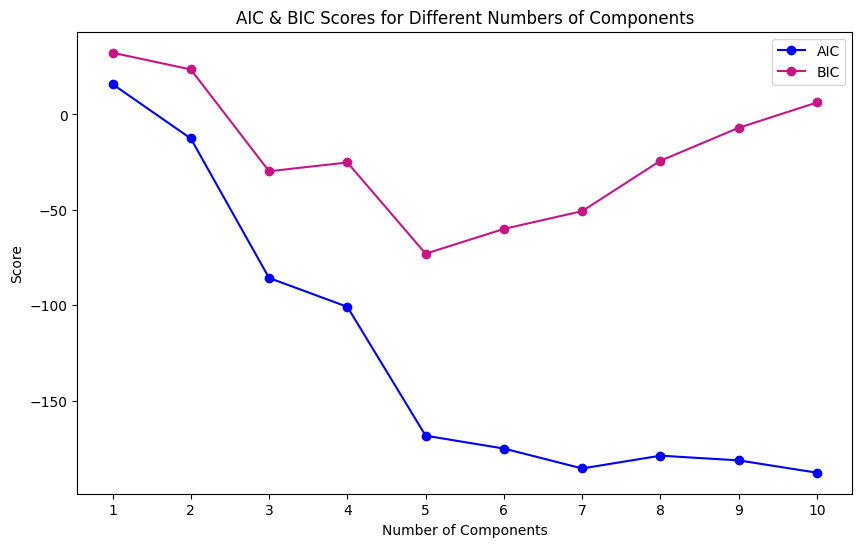

In [ ]:
aic_scores = []
bic_scores = []
n_components_range = range(1, 11)  # Trying models with 1 to 10 components

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(features_scaled)
    aic_scores.append(gmm.aic(features_scaled))
    bic_scores.append(gmm.bic(features_scaled))

# Plotting AIC and BIC scores
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, aic_scores, label='AIC', color='blue', marker='o')
plt.plot(n_components_range, bic_scores, label='BIC', color='mediumvioletred', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('AIC & BIC Scores for Different Numbers of Components')
plt.xticks(n_components_range)  # Ensure all x-axis values (1 to 10) are shown
plt.legend()
plt.show()

The lowest BIC score was observed at 5 components.
Therefore, the optimal number of components is chosen to be 5.

(Both KMeans and Hierarchical clustering methods also suggested 5 clusters as the optimal number.)

In [ ]:
# Fitting the Gaussian Mixture Model with 5 components 

gmm = GaussianMixture(n_components=5, random_state=42) 
gmm.fit(features_scaled)

GaussianMixture(n_components=5, random_state=42)

Scatter plot to visualize the clusters of customers obtained based on Annual Income and Spending Score

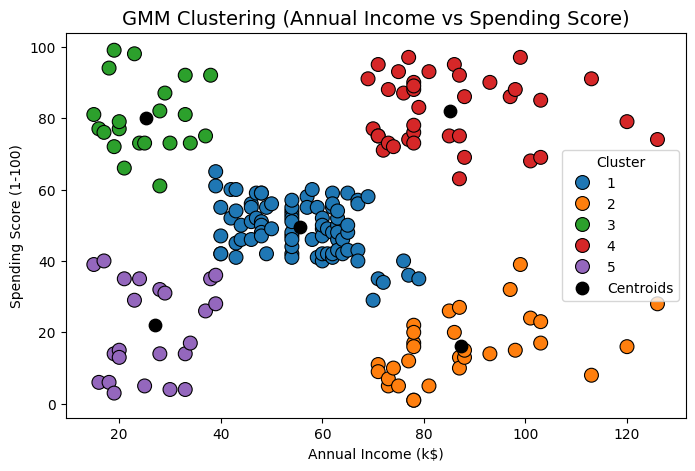

In [ ]:
# Predicting the clusters
df['GMM_Cluster'] = gmm.predict(features_scaled)+1

# Extracting cluster centroids (means of Gaussian components)
centroids = scaler.inverse_transform(gmm.means_)  # Inverse transform to original scale

# Visualizing the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='GMM_Cluster', palette='tab10', s=100, edgecolor='k')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='o', s=80, label='Centroids')
plt.title('GMM Clustering (Annual Income vs Spending Score)', fontsize=14)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

Calculating the Silhouette score of GMM clusters

In [ ]:
# Fitting the Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(features_scaled)  # Assigning cluster labels

# Calculate Silhouette Score
silhouette_avg = silhouette_score(features_scaled, df['GMM_Cluster'])

# Print the Silhouette Score
print(f"Silhouette Score for GMM: {silhouette_avg:.5f}")

Silhouette Score for GMM: 0.56379


Displaying the Silhouette score of GMM clusters

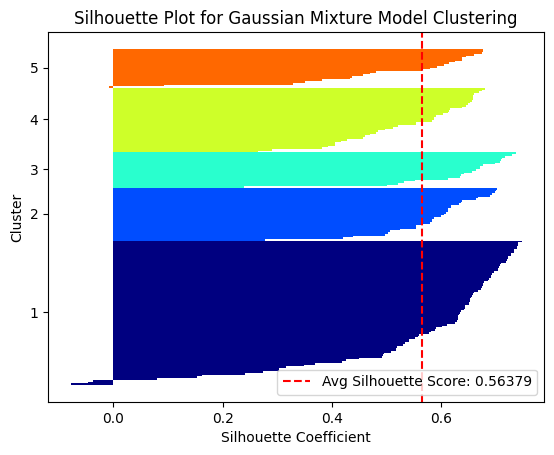

In [ ]:
cluster_labels = df['GMM_Cluster'].values

# Compute the silhouette scores for each sample
silhouette_vals = silhouette_samples(features_scaled, cluster_labels)

# Initialize y-axis boundaries and yticks for the plot
y_ax_lower, y_ax_upper = 0, 0
yticks = []
n_clusters = len(np.unique(cluster_labels))

# Loop through each cluster and plot silhouette values
for i in range(n_clusters):
    c_silhouette_vals = silhouette_vals[cluster_labels == i]
    c_silhouette_vals.sort()
    
    y_ax_upper += len(c_silhouette_vals)

    color = plt.cm.jet(float(i) / n_clusters)

    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1, edgecolor='none', color=color)

    yticks.append(y_ax_lower + (y_ax_upper - y_ax_lower) / 2.)
    y_ax_lower += len(c_silhouette_vals)  # Update for the next cluster

# Calculate the average silhouette score
silhouette_avg = np.mean(silhouette_vals)

# Add a vertical red line for the average silhouette score
plt.axvline(silhouette_avg, color='red', linestyle='--', label=f'Avg Silhouette Score: {silhouette_avg:.5f}')

plt.yticks(yticks, range(1, n_clusters + 1))  # Labels 1 to n_clusters
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.title('Silhouette Plot for Gaussian Mixture Model Clustering')
plt.legend()
plt.show()

Bar Chart to analyze cluster sizes

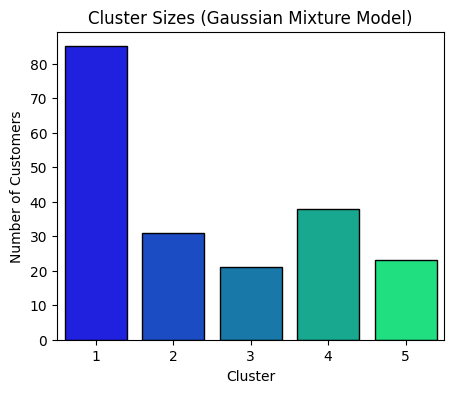

In [ ]:
cluster_sizes = df['GMM_Cluster'].value_counts().sort_index()

plt.figure(figsize=(5, 4))
sns.barplot(x=cluster_sizes.index + 1, y=cluster_sizes.values, hue=cluster_sizes.index, palette='winter',edgecolor='black', legend=False)
plt.title('Cluster Sizes (Gaussian Mixture Model)', fontsize=12)
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

#### Using 'Age', 'Annual Income' and 'Spending Score' features

Visualizing the mean values of numerical features by cluster


In [ ]:
features = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]  

scaler = MinMaxScaler()   # Standardizing the features
features_scaled = scaler.fit_transform(features)

gmm = GaussianMixture(n_components=5, random_state=42)  # Fitting Gaussian Mixture Model
gmm.fit(features_scaled)

df['GMM_Cluster'] = gmm.predict(features_scaled) # Predicting the clusters

numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']   

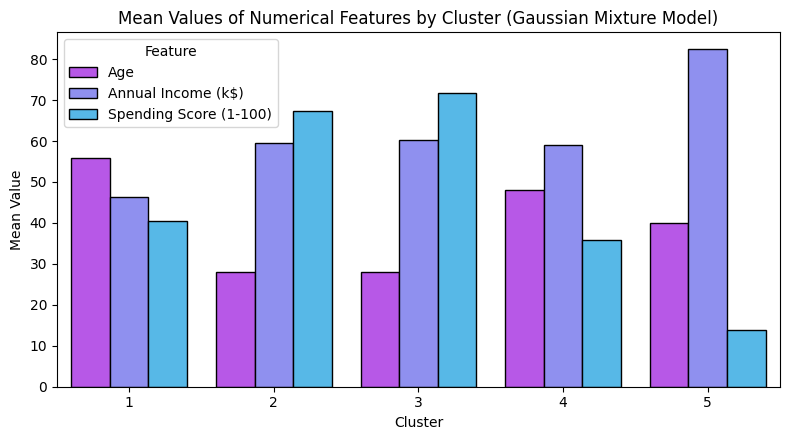

In [ ]:

# Calculating mean values of numerical features for each GMM cluster
cluster_means = df.groupby('GMM_Cluster')[numerical_features].mean().reset_index()
cluster_means.rename(columns={'GMM_Cluster': 'Cluster'}, inplace=True)

cluster_means_melted = cluster_means.melt(id_vars='Cluster', var_name='Feature', value_name='Mean Value')  # Melting the cluster means DataFrame to have a long format
cluster_means_melted['Cluster'] += 1

# Defining the number of features
num_features = len(cluster_means_melted['Feature'].unique())

# Visualizing the characteristics of each cluster
plt.figure(figsize=(8, 4.5))
sns.barplot(data=cluster_means_melted, x='Cluster', y='Mean Value', hue='Feature', palette='cool_r',edgecolor='black')
plt.title('Mean Values of Numerical Features by Cluster (Gaussian Mixture Model)', fontsize=12)
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.legend(title='Feature')
plt.tight_layout()
plt.show()


Exploring the distributions of Age, Annual Income and Spending Score features, by GMM cluster.

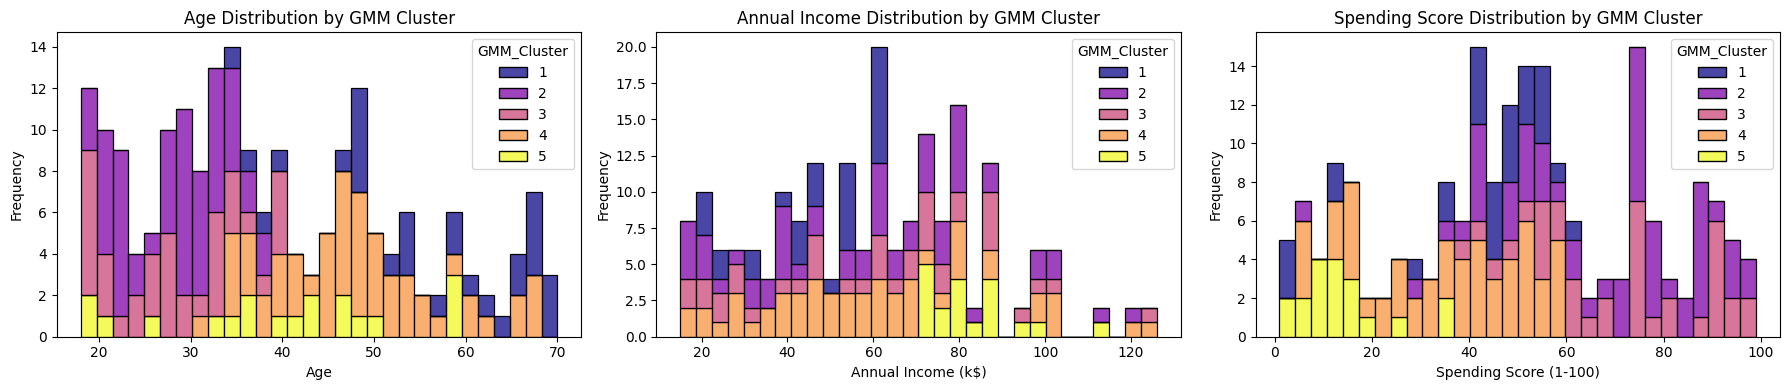

In [ ]:
df['GMM_Cluster'] = df['GMM_Cluster'] + 1  

plt.figure(figsize=(18, 4))
# Plotting the distribution of 'Age' by GMM Cluster
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Age', hue='GMM_Cluster', multiple='stack', bins=30, palette='plasma')
plt.title('Age Distribution by GMM Cluster')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plotting the distribution of 'Annual Income (k$)' by GMM Cluster
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='Annual Income (k$)', hue='GMM_Cluster', multiple='stack', bins=30, palette='plasma')
plt.title('Annual Income Distribution by GMM Cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

# Plotting the distribution of 'Spending Score (1-100)' by GMM Cluster
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='Spending Score (1-100)', hue='GMM_Cluster', multiple='stack', bins=30, palette='plasma')
plt.title('Spending Score Distribution by GMM Cluster')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.tight_layout()  
plt.show()

In conclusion, the Gaussian Mixture Model (GMM) yielded the highest silhouette score of 0.56379, slightly outperforming K-Means (0.55992) and Hierarchical Clustering (0.55837), suggesting that GMM provides the most accurate clustering solution among the three models.